In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ks_2samp

In [76]:
#Load the data
som=pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Soma results.xlsx", header=0, index_col="Gene name")
som.head()

,HC 1,HC 2,ALS S1,ALS S2,ALS F1,ALS S3,HC 3,HC 4,ALS S4,HC 5,...,ALS S21,ALS F22,HC 25,ALS F23,ALS S22,ALS F24,ALS S23,HC 6,ALS F25,ALS S24
Gene name,,,,,,,,,,,,,,,,,,,,,
NEFL,2269.1,221.6,343.8,301.1,283.6,302.9,233.6,214.9,253.0,529.3,...,272.8,274.0,347.4,404.1,238.5,323.0,349.1,312.1,232.4,233.2
CHIT1,1400.3,1555.5,2055.3,1346.7,971.4,2752.7,1346.1,736.7,1421.0,3755.3,...,1092.5,5255.4,1033.5,297.2,952.0,901.5,894.7,1719.8,2007.7,1041.7
MPZ,1781.2,1039.1,1174.6,974.8,1031.7,932.6,1959.6,1217.4,1027.9,707.9,...,786.7,894.6,1068.8,1049.1,1264.8,1094.9,1408.4,808.8,956.3,1408.9
GRIA4,3457.8,3768.6,2770.5,3439.6,2608.8,2955.4,2169.2,3565.3,2232.5,1992.9,...,2943.5,3397.9,2309.0,2927.2,3282.2,2893.5,4667.4,2459.0,2485.6,5034.1
PLD3,418.4,750.4,484.0,1208.1,1159.7,490.1,583.7,283.9,432.0,439.8,...,435.7,627.8,535.0,453.4,648.4,652.9,507.6,544.4,660.3,595.6


In [77]:
# Apply log2 transform
soma = som.applymap(lambda x: np.log2(x + 1))  # handles zeros
soma.head()

,HC 1,HC 2,ALS S1,ALS S2,ALS F1,ALS S3,HC 3,HC 4,ALS S4,HC 5,...,ALS S21,ALS F22,HC 25,ALS F23,ALS S22,ALS F24,ALS S23,HC 6,ALS F25,ALS S24
Gene name,,,,,,,,,,,,,,,,,,,,,
NEFL,11.148540,7.798310,8.429616,8.238882,8.152792,8.247453,7.874059,7.754219,7.988685,9.050665,...,8.096979,8.103288,8.444601,8.662134,7.903882,8.339850,8.451623,8.290480,7.866661,7.871597
CHIT1,10.452550,10.604090,11.005835,10.396284,9.925406,11.427156,10.395641,9.526890,10.473706,11.875097,...,10.094738,12.359859,10.014718,8.220136,9.896332,9.817783,9.806872,10.748864,10.972046,10.026108
MPZ,10.799444,10.022507,10.199182,9.930442,10.012205,9.866661,10.937080,10.250772,10.006887,9.469438,...,9.621502,9.806711,10.063125,10.036311,10.305834,10.097900,10.460865,9.661422,9.902827,10.461377
GRIA4,11.756056,11.880196,11.436451,11.748444,11.349724,11.529626,11.083612,11.800212,11.125091,10.961377,...,11.523807,11.730852,11.173677,11.515798,11.680887,11.499098,12.188712,11.264443,11.279959,12.297805
PLD3,8.712183,9.553437,8.921841,10.239718,10.180779,8.939873,9.191553,8.154312,8.758223,8.783980,...,8.770499,9.296457,9.066089,8.827819,9.342964,9.352926,8.990388,9.091171,9.369161,9.220620


In [78]:
stat, p_value = shapiro(soma)

if p_value > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is not normally distributed (reject H0)")

Data is not normally distributed (reject H0)


C:\Users\Client\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


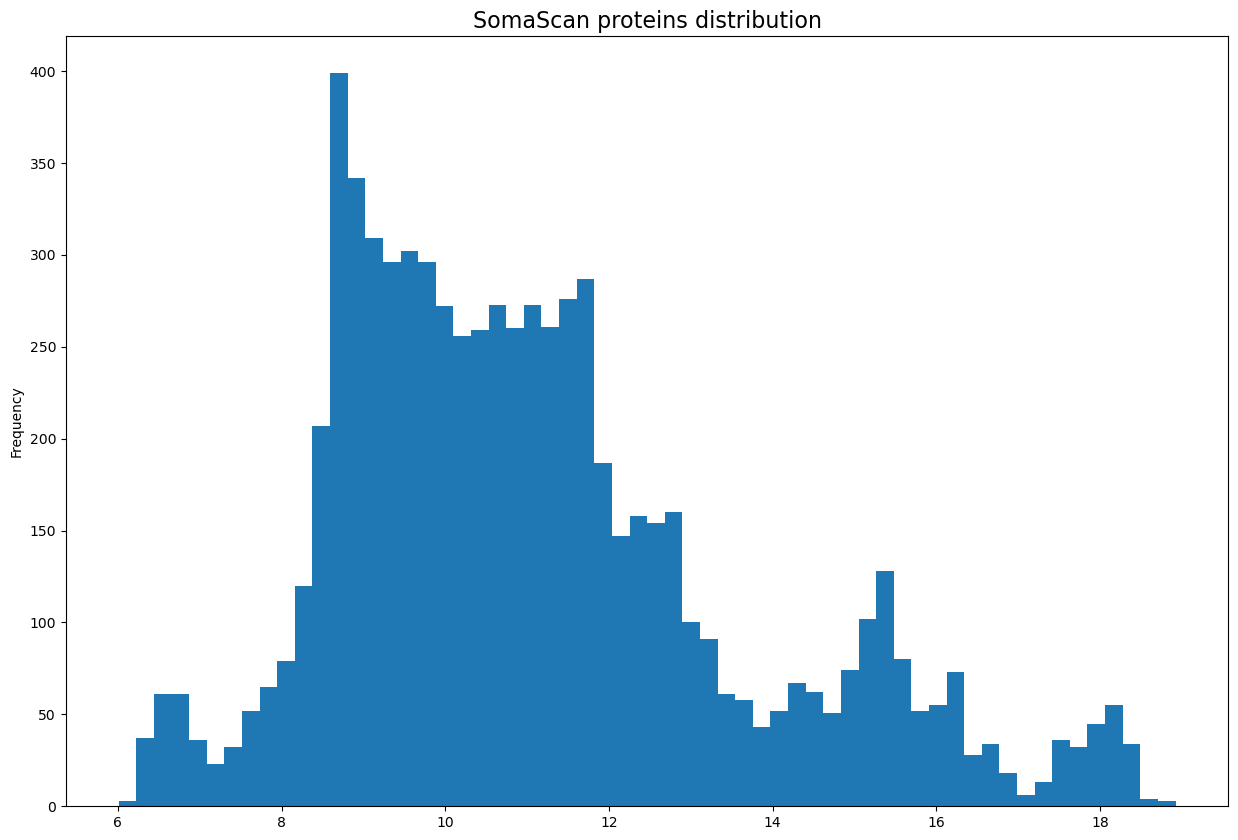

In [79]:
soma.stack().plot.hist(bins=60, figsize=(15, 10))
plt.title("SomaScan proteins distribution", fontsize=16)
plt.show()

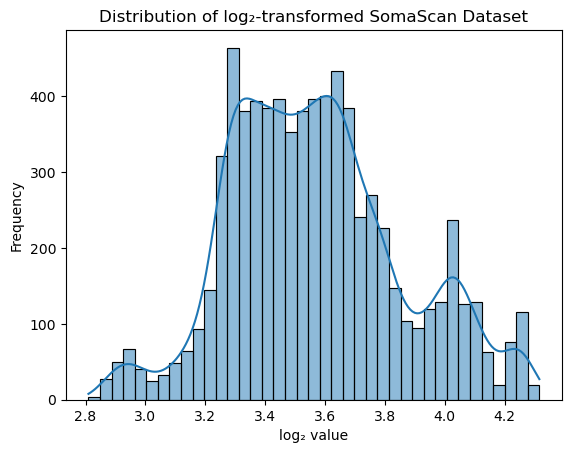

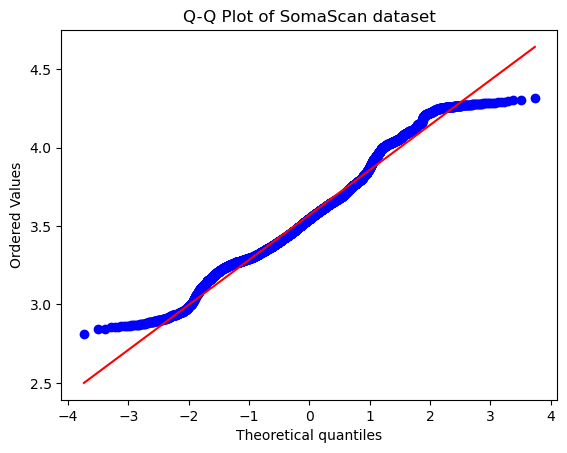

Shapiro-Wilk p-value: 6.959837612009603e-30
D’Agostino and Pearson p-value: 5.8280689865746626e-30


C:\Users\Client\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, kstest, expon, gamma, lognorm, beta

# Load and log₂-transform the dataset
df = soma 
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_log2 = df.copy()
df_log2[numeric_cols] = np.log2(df[numeric_cols] + 1)

# Flatten all numeric values into a single array
all_values = df_log2[numeric_cols].values.flatten()
all_values = all_values[~np.isnan(all_values)]  # Remove NaNs

# Visualize the overall distribution
sns.histplot(all_values, kde=True)
plt.title("Distribution of log₂-transformed SomaScan Dataset")
plt.xlabel("log₂ value")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot
import scipy.stats as stats
stats.probplot(all_values, dist="norm", plot=plt)
plt.title("Q-Q Plot of SomaScan dataset")
plt.show()

# Normality tests
print("Shapiro-Wilk p-value:", shapiro(all_values)[1])
print("D’Agostino and Pearson p-value:", normaltest(all_values)[1])


In [31]:
from scipy.stats import kstest, expon, gamma, lognorm, beta

# Fit and compare to known distributions
for dist_name, dist in [('Exponential', expon), ('Gamma', gamma), ('Log-normal', lognorm), ('Beta', beta)]:
    params = dist.fit(all_values)
    ks_stat, ks_p = kstest(all_values, dist.cdf, args=params)
    print(f'{dist_name} fit: KS p-value = {ks_p:.4f}')


Exponential fit: KS p-value = 0.0000
Gamma fit: KS p-value = 0.0000
Log-normal fit: KS p-value = 0.0000
Beta fit: KS p-value = 0.0000


In [32]:
# Automatically identify group columns by their prefixes
group1= soma.loc[:, soma.columns.str.startswith('HC ')]
group2= soma.loc[:, soma.columns.str.startswith('ALS ')]

In [33]:
stat, p_value = mannwhitneyu(group1.iloc[0], group2.iloc[0], alternative='two-sided')

stats = []
p_vals = []
for i in range(group1.shape[0]):
    stat, p_value = mannwhitneyu(group1.iloc[i], group2.iloc[i], alternative='two-sided', method ="exact")
    stats.append(stat)
    p_vals.append(p_value)

In [34]:
# Add the results DataFrame to the original data DataFrame
soma['U-stat'] = stats
soma['p_value'] = p_vals
soma.head()

,HC 1,HC 2,ALS S1,ALS S2,ALS F1,ALS S3,HC 3,HC 4,ALS S4,HC 5,...,HC 25,ALS F23,ALS S22,ALS F24,ALS S23,HC 6,ALS F25,ALS S24,U-stat,p_value
Gene name,,,,,,,,,,,,,,,,,,,,,
NEFL,11.148540,7.798310,8.429616,8.238882,8.152792,8.247453,7.874059,7.754219,7.988685,9.050665,...,8.444601,8.662134,7.903882,8.339850,8.451623,8.290480,7.866661,7.871597,487.5,0.199409
CHIT1,10.452550,10.604090,11.005835,10.396284,9.925406,11.427156,10.395641,9.526890,10.473706,11.875097,...,10.014718,8.220136,9.896332,9.817783,9.806872,10.748864,10.972046,10.026108,545.0,0.531757
MPZ,10.799444,10.022507,10.199182,9.930442,10.012205,9.866661,10.937080,10.250772,10.006887,9.469438,...,10.063125,10.036311,10.305834,10.097900,10.460865,9.661422,9.902827,10.461377,676.0,0.385924
GRIA4,11.756056,11.880196,11.436451,11.748444,11.349724,11.529626,11.083612,11.800212,11.125091,10.961377,...,11.173677,11.515798,11.680887,11.499098,12.188712,11.264443,11.279959,12.297805,595.0,0.958860
PLD3,8.712183,9.553437,8.921841,10.239718,10.180779,8.939873,9.191553,8.154312,8.758223,8.783980,...,9.066089,8.827819,9.342964,9.352926,8.990388,9.091171,9.369161,9.220620,642.0,0.634091


In [35]:
#df['average'] = df.mean(numeric_only=True, axis=1)
soma['Mean Control'] = soma.loc[:, soma.columns.str.startswith('HC ')].mean(axis=1)
soma['Mean ALS'] = soma.loc[:, soma.columns.str.startswith('ALS ')].mean(axis=1)

In [36]:
#Fold Change
soma["FC ALS-C"]= soma["Mean ALS"]/soma["Mean Control"]

In [37]:
#Log 2 FC
soma["Log2FC ALS-C"]=np.log2(soma["FC ALS-C"])
soma.head()

,HC 1,HC 2,ALS S1,ALS S2,ALS F1,ALS S3,HC 3,HC 4,ALS S4,HC 5,...,ALS S23,HC 6,ALS F25,ALS S24,U-stat,p_value,Mean Control,Mean ALS,FC ALS-C,Log2FC ALS-C
Gene name,,,,,,,,,,,,,,,,,,,,,
NEFL,11.148540,7.798310,8.429616,8.238882,8.152792,8.247453,7.874059,7.754219,7.988685,9.050665,...,8.451623,8.290480,7.866661,7.871597,487.5,0.199409,8.311382,8.304977,0.999229,-0.001112
CHIT1,10.452550,10.604090,11.005835,10.396284,9.925406,11.427156,10.395641,9.526890,10.473706,11.875097,...,9.806872,10.748864,10.972046,10.026108,545.0,0.531757,10.236831,10.321109,1.008233,0.011829
MPZ,10.799444,10.022507,10.199182,9.930442,10.012205,9.866661,10.937080,10.250772,10.006887,9.469438,...,10.460865,9.661422,9.902827,10.461377,676.0,0.385924,10.200432,10.144128,0.994480,-0.007985
GRIA4,11.756056,11.880196,11.436451,11.748444,11.349724,11.529626,11.083612,11.800212,11.125091,10.961377,...,12.188712,11.264443,11.279959,12.297805,595.0,0.958860,11.568672,11.619487,1.004392,0.006323
PLD3,8.712183,9.553437,8.921841,10.239718,10.180779,8.939873,9.191553,8.154312,8.758223,8.783980,...,8.990388,9.091171,9.369161,9.220620,642.0,0.634091,9.279881,9.201568,0.991561,-0.012227


In [24]:
soma.to_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Soma Mann results no mistake.xlsx")

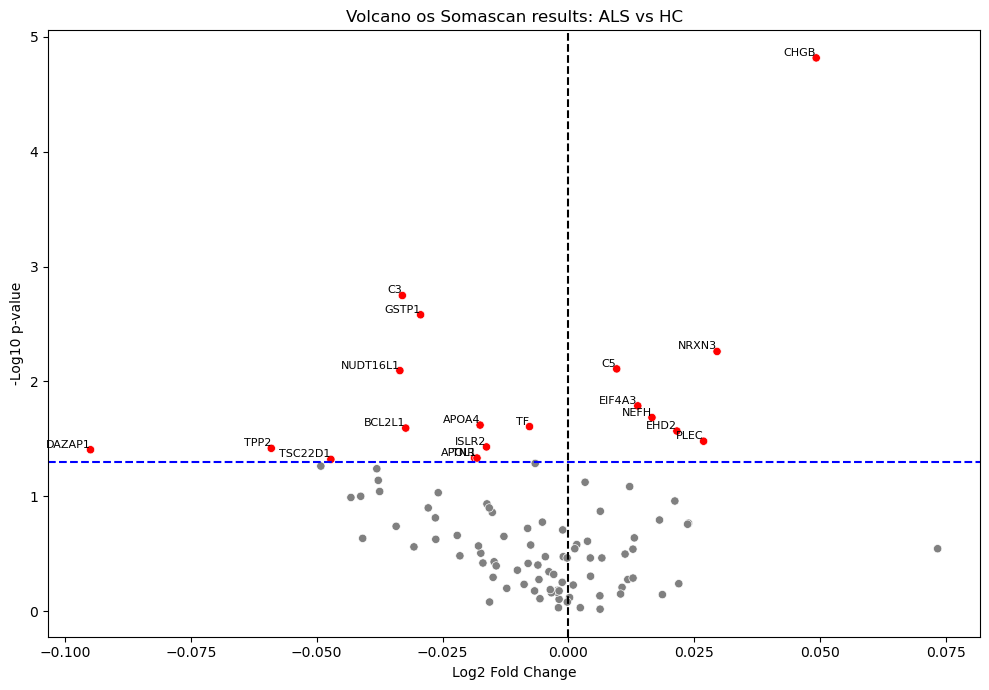

In [81]:
# Identify columns by group prefix
hc_cols = [col for col in df.columns if col.startswith('HC ')]
als_cols = [col for col in df.columns if col.startswith('ALS ')]

# Prepare results
volcano_data = []

for protein in df.index:
    hc_values = df.loc[protein, hc_cols].dropna()
    als_values = df.loc[protein, als_cols].dropna()

    # Calculate log2 fold change
    mean_hc = np.mean(hc_values)
    mean_als = np.mean(als_values)
    log2_fc = np.log2(mean_als / mean_hc) if mean_hc > 0 else np.nan

    # Mann-Whitney U test
    stat, p_value = mannwhitneyu(hc_values, als_values, alternative='two-sided')

    volcano_data.append({
        'Protein': protein,
        'log2FC': log2_fc,
        '-log10(p-value)': -np.log10(p_value),
        'p-value': p_value
    })

# Convert to DataFrame
volcano_df = pd.DataFrame(volcano_data)

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=volcano_df, x='log2FC', y='-log10(p-value)', hue=volcano_df['p-value'] < 0.05, palette={True: 'red', False: 'gray'}, legend=False)

# Add threshold lines
plt.axhline(-np.log10(0.05), linestyle='--', color='blue')
plt.axvline(0, linestyle='--', color='black')

# Label all significant proteins
for _, row in volcano_df.iterrows():
    if row['p-value'] < 0.05:
        plt.text(row['log2FC'], row['-log10(p-value)'], row['Protein'], fontsize=8, ha='right', va='bottom')

plt.title('Volcano os Somascan results: ALS vs HC')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 p-value')
plt.tight_layout()
plt.show()


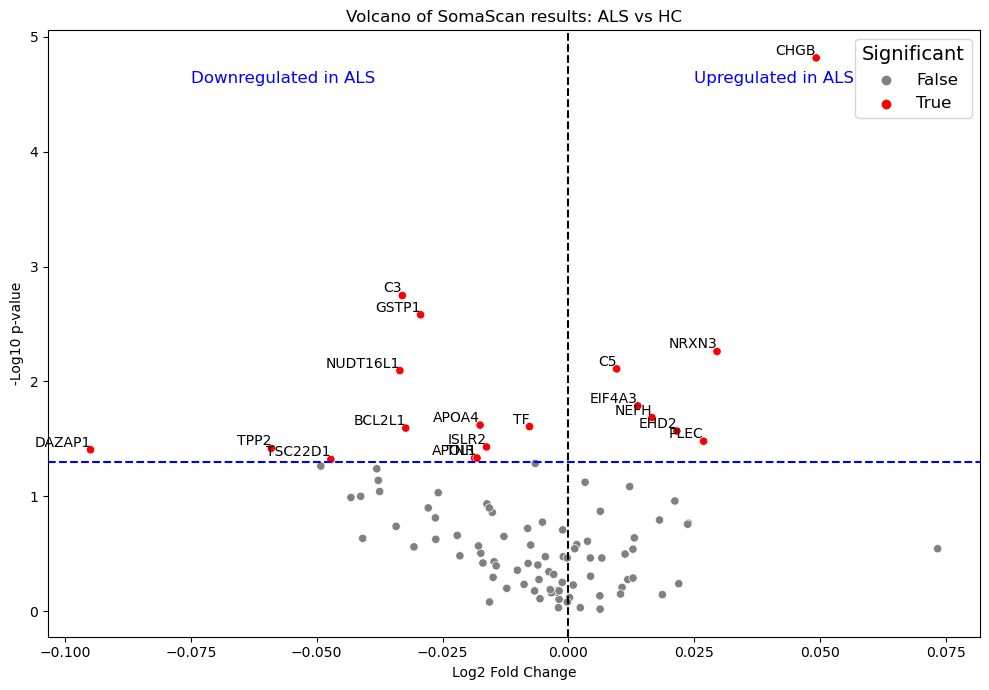

In [88]:
# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=volcano_df,
    x='log2FC',
    y='-log10(p-value)',
    hue=volcano_df['p-value'] < 0.05,
    palette={True: 'red', False: 'gray'},
    legend=True
)

# Customize legend font size
plt.legend(title='Significant', fontsize=12, title_fontsize=14)

# Add threshold lines
plt.axhline(-np.log10(0.05), linestyle='--', color='blue')
plt.axvline(0, linestyle='--', color='black')


# Add up/downregulated labels near the vertical line
plt.text(-0.075, 4.6, 'Downregulated in ALS', fontsize=12, color='blue')
plt.text(0.025, 4.6, 'Upregulated in ALS', fontsize=12, color='blue')

# Label all significant proteins with larger font
for _, row in volcano_df.iterrows():
    if row['p-value'] < 0.05:
        plt.text(
            row['log2FC'],
            row['-log10(p-value)'],
            row['Protein'],
            fontsize=10,  # Increased from 8 to 10
            ha='right',
            va='bottom'
        )

plt.title('Volcano of SomaScan results: ALS vs HC')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 p-value')
plt.tight_layout()
plt.show()


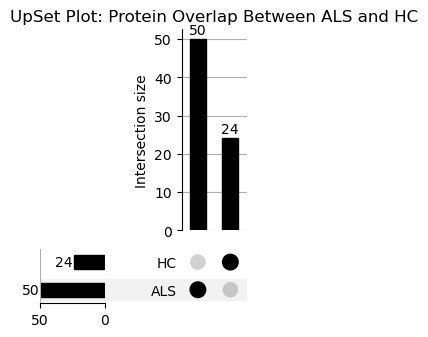

In [39]:
import pandas as pd
from upsetplot import UpSet, from_memberships
import matplotlib.pyplot as plt

# Load your dataset
df = soma

# Identify ALS and HC columns
als_cols = df.columns[df.columns.str.startswith('ALS ')]
hc_cols = df.columns[df.columns.str.startswith('HC ')]

# Create sets of detected proteins (non-null or above threshold)
als_proteins = set(df[als_cols].dropna(how='all').columns.str.replace('ALS ', ''))
hc_proteins = set(df[hc_cols].dropna(how='all').columns.str.replace('HC ', ''))

# Build membership list
memberships = []
all_proteins = sorted(als_proteins.union(hc_proteins))
for protein in all_proteins:
    groups = []
    if protein in als_proteins:
        groups.append('ALS')
    if protein in hc_proteins:
        groups.append('HC')
    memberships.append(groups)

# Create UpSet plot
data = from_memberships(memberships)
upset = UpSet(data, subset_size='count', show_counts=True)
upset.plot()
plt.title("UpSet Plot: Protein Overlap Between ALS and HC")
plt.show()


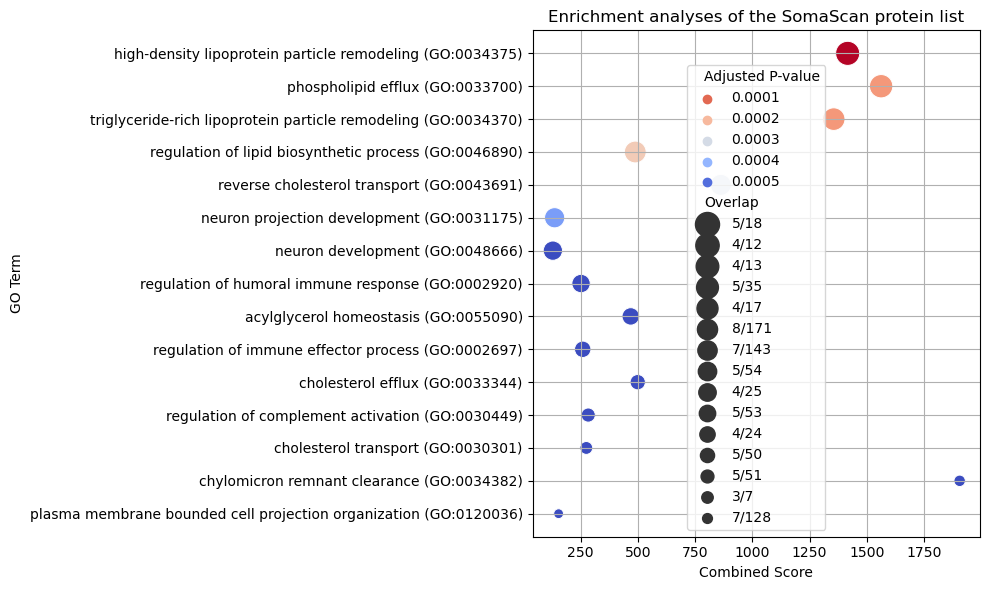

In [53]:
from gseapy import enrichr

gene_list = soma.index.tolist()

gsea_results = enrichr(gene_list=gene_list,
                       gene_sets='GO_Biological_Process_2021',
                       organism='Human',
                       outdir='gsea_output')
# Load results
res_df = gsea_results.res2d
top_hits = res_df.sort_values('Adjusted P-value', ascending=True).head(15)


#import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=top_hits,
    x='Combined Score',
    y='Term',
    size='Overlap',  # You can also parse this to get the number of genes
    hue='Adjusted P-value',
    palette='coolwarm_r',
    sizes=(50, 300),
    legend='brief'
)
plt.title('Enrichment analyses of the SomaScan protein list')
plt.xlabel('Combined Score')
plt.ylabel('GO Term')
plt.grid(True)
plt.tight_layout()
plt.show()

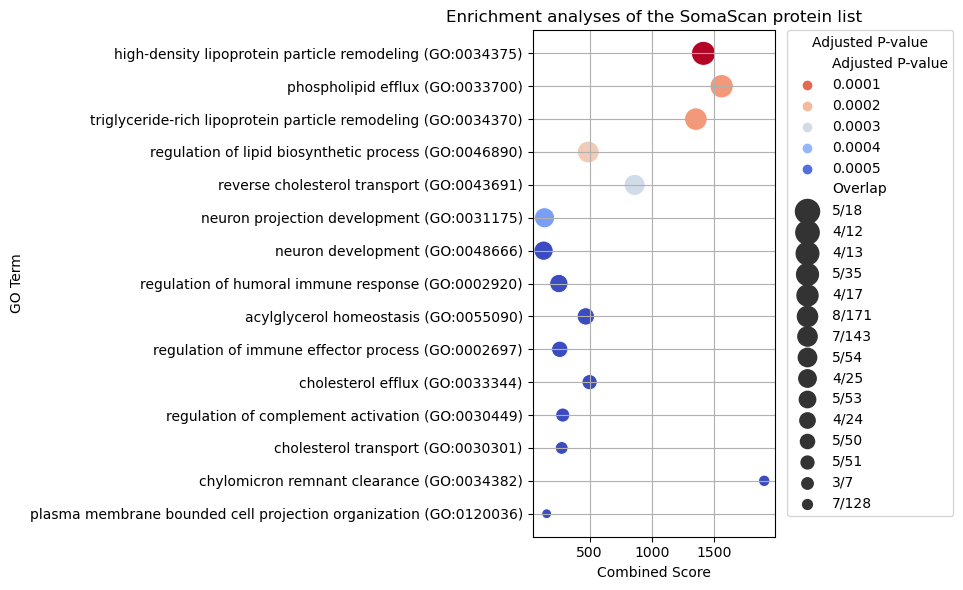

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=top_hits,
    x='Combined Score',
    y='Term',
    size='Overlap',
    hue='Adjusted P-value',
    palette='coolwarm_r',
    sizes=(50, 300),
    legend='brief'
)

# Move legend outside the plot
plt.legend(
    title='Adjusted P-value',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)

plt.title('Enrichment analyses of the SomaScan protein list')
plt.xlabel('Combined Score')
plt.ylabel('GO Term')
plt.grid(True)
plt.tight_layout()

In [17]:
# Extract only the expression data (excluding U-stat and p_value columns)
expression_data = soma.loc[:, soma.columns.str.startswith(('HC ', 'ALS '))]


In [18]:
# Transpose so that rows = samples, columns = proteins
expression_data_T = expression_data.T


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(expression_data_T)


In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # You can increase to 3 for 3D plots
pca_result = pca.fit_transform(scaled_data)


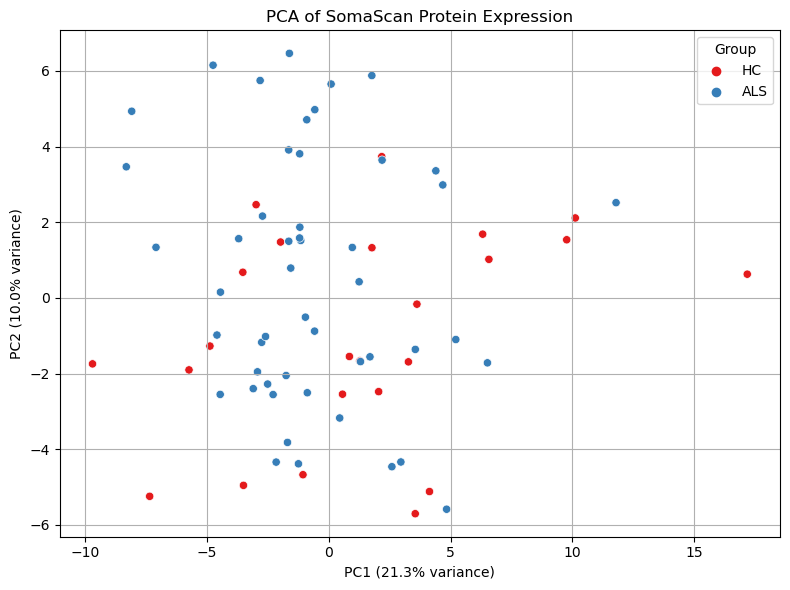

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Group'] = ['ALS' if col.startswith('ALS ') else 'HC' for col in expression_data.columns]

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Group', palette='Set1')
plt.title('PCA of SomaScan Protein Expression')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#PCA human studies vs cell lines

In [60]:
# Filter for proteins with p-value less than 0.05
significant_proteins = soma[soma['p_value'] < 0.05].index.tolist()



In [61]:
significant_proteins

['TNR',
 'APOL1',
 'NUDT16L1',
 'ISLR2',
 'GSTP1',
 'NRXN3',
 'APOA4',
 'DAZAP1',
 'EHD2',
 'C5',
 'TPP2',
 'C3',
 'TSC22D1',
 'PLEC',
 'TF',
 'BCL2L1',
 'EIF4A3',
 'CHGB',
 'NEFH']

In [63]:
# Select only the rows corresponding to significant proteins
soma_sig = soma.loc[soma.index.isin(significant_proteins)]

# Extract expression data only (exclude U-stat and p_value columns)
expression_sig = soma_sig.loc[:, soma_sig.columns.str.startswith(('HC ', 'ALS '))]


In [64]:
from sklearn.preprocessing import StandardScaler

# Transpose: rows = samples, columns = proteins
expression_sig_T = expression_sig.T

# Standardize
scaler = StandardScaler()
scaled_sig_data = scaler.fit_transform(expression_sig_T)


In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_sig_data)


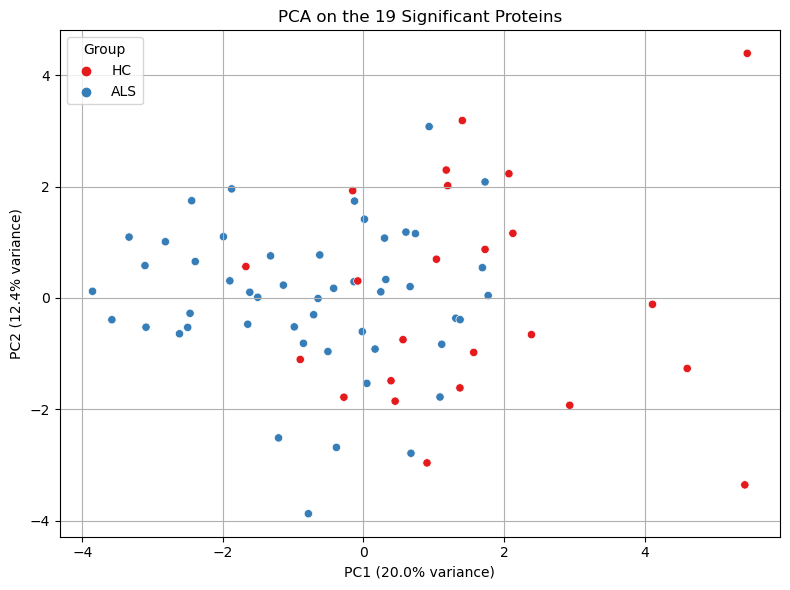

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Group'] = ['ALS' if col.startswith('ALS ') else 'HC' for col in expression_sig.columns]

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Group', palette='Set1')
plt.title('PCA on the 19 Significant Proteins')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:
from sklearn.preprocessing import StandardScaler

# Transpose: rows = samples, columns = proteins
expression_sig_T = expression_sig.T

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(expression_sig_T)

# Now the shape of scaled_data matches the number of significant proteins
scaled_df = pd.DataFrame(scaled_data, index=expression_sig_T.index, columns=expression_sig_T.columns)


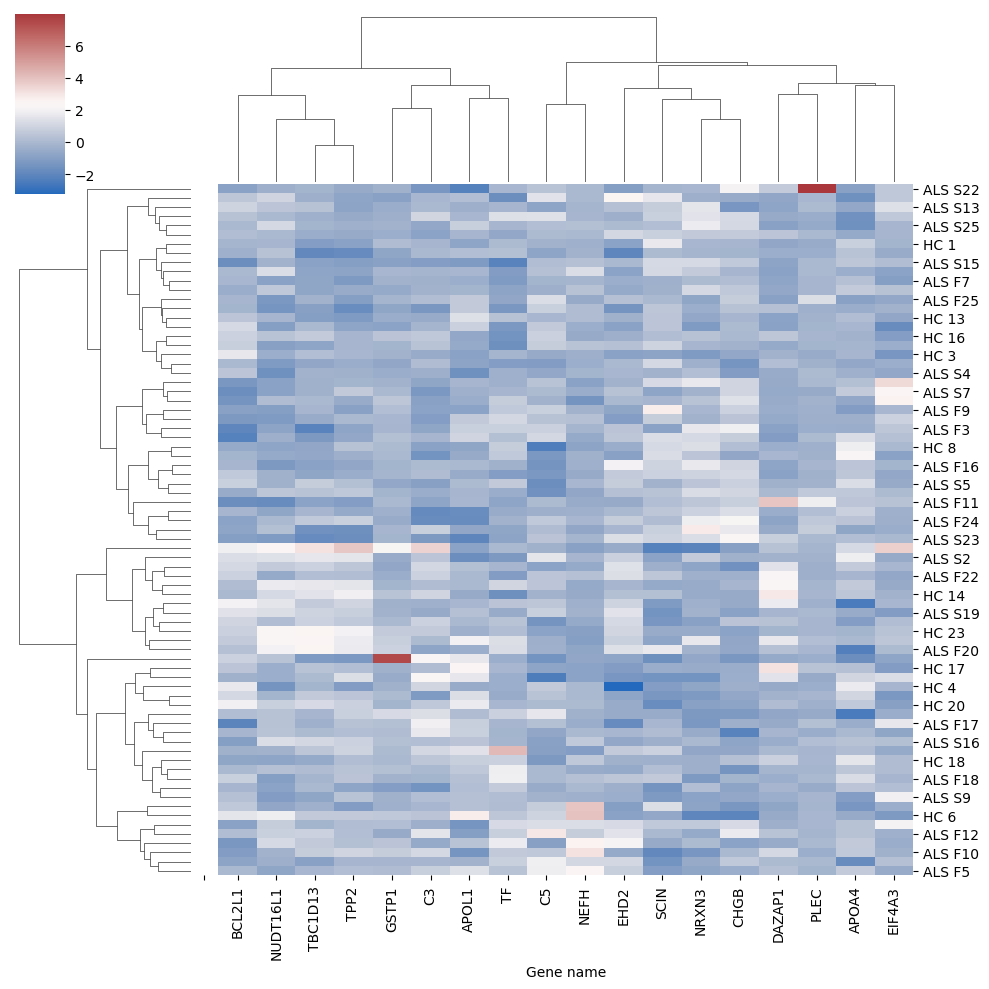

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add group labels
group_labels = ['ALS' if name.startswith('ALS ') else 'HC' for name in scaled_df.index]
row_colors = pd.Series(group_labels).map({'ALS':'red', 'HC':'blue'})

# Plot clustermap
sns.clustermap(scaled_df, method='ward', metric='euclidean', cmap='vlag', row_colors=row_colors)
plt.show()


In [96]:
# Get sample names in desired order: HC first, then ALS
hc_samples = [col for col in expression_sig.columns if col.startswith('HC ')]
als_samples = [col for col in expression_sig.columns if col.startswith('ALS ')]
ordered_samples = hc_samples + als_samples

# Reorder columns
expression_sig = expression_sig[ordered_samples]


In [97]:
from sklearn.preprocessing import StandardScaler

# Transpose for scaling across proteins
expression_sig_T = expression_sig.T
scaler = StandardScaler()
scaled_data = scaler.fit_transform(expression_sig_T)

# Convert back to DataFrame with original sample names
scaled_df = pd.DataFrame(scaled_data, index=expression_sig_T.index, columns=expression_sig_T.columns)

# Transpose back to proteins as rows
scaled_df = scaled_df.T


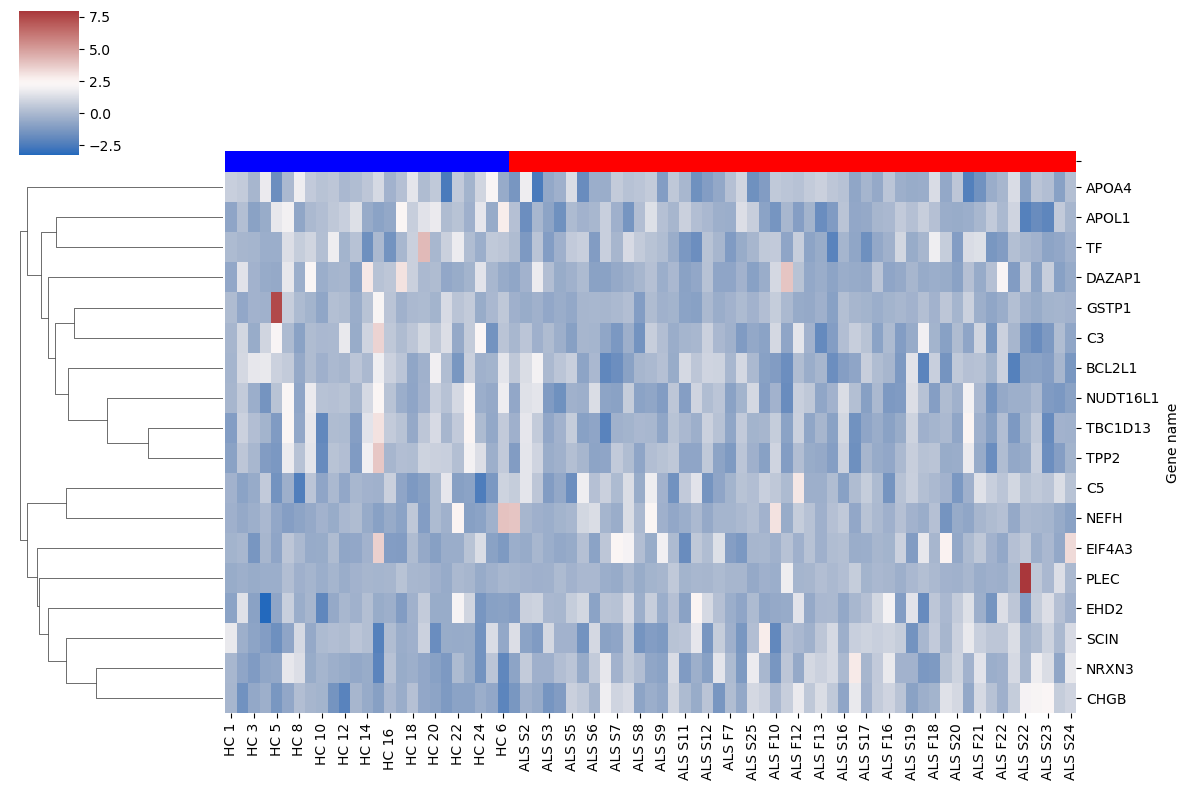

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create group color labels
group_labels = ['ALS' if name.startswith('ALS ') else 'HC' for name in scaled_df.columns]
col_colors = pd.Series(group_labels, index=scaled_df.columns).map({'ALS':'red', 'HC':'blue'})

# Plot clustermap with row clustering only
sns.clustermap(scaled_df, row_cluster=True, col_cluster=False, col_colors=col_colors,
               cmap='vlag', figsize=(12, 8))
plt.show()


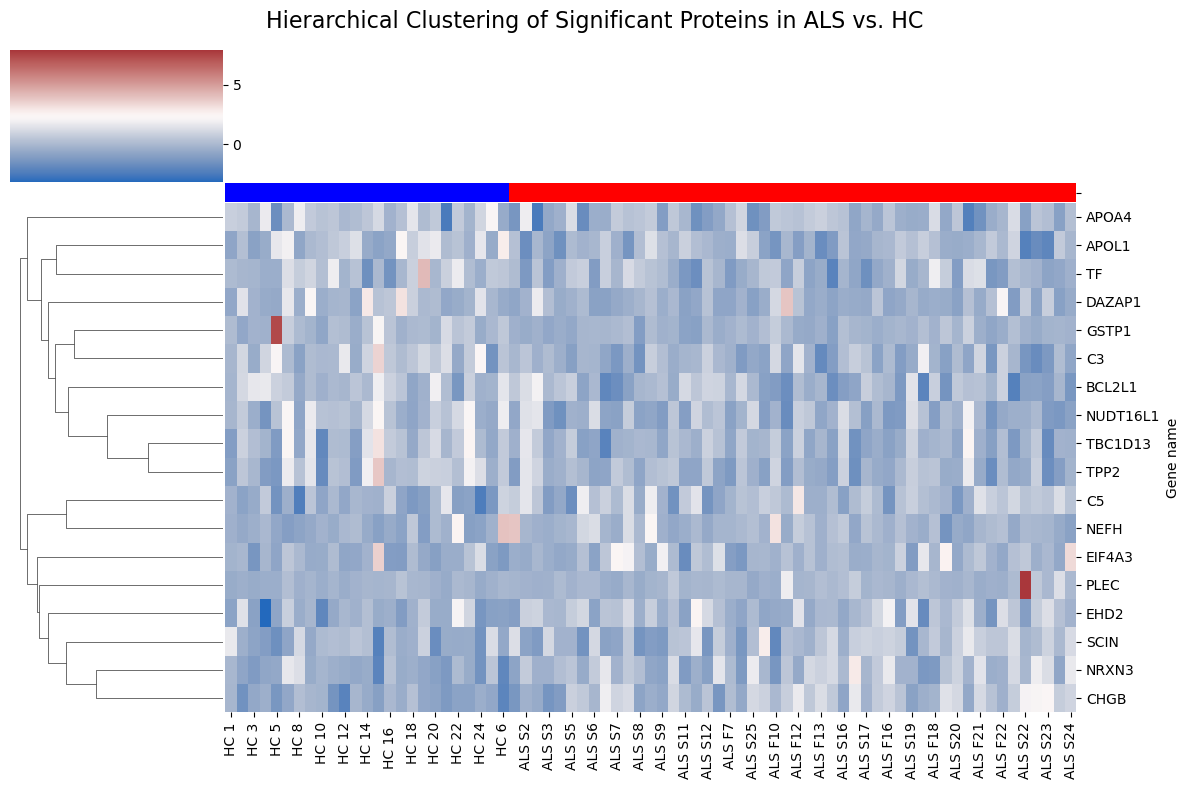

In [99]:
# Create the clustermap and assign to variable
g = sns.clustermap(scaled_df, row_cluster=True, col_cluster=False, col_colors=col_colors,
                   cmap='vlag', figsize=(12, 8))

# Add a title to the entire figure
g.fig.suptitle('Hierarchical Clustering of Significant Proteins in ALS vs. HC', fontsize=16)

# Adjust layout to make room for the title
g.fig.subplots_adjust(top=0.93)

plt.show()


In [68]:
# Get list of significant proteins
significant_proteins = soma[soma['p_value'] < 0.05].index.tolist()

# Subset expression data
expression_sig = soma.loc[significant_proteins, soma.columns.str.startswith(('HC ', 'ALS '))]


In [69]:
# Reset index to bring gene names into a column
expression_sig_reset = expression_sig.reset_index()  # This creates a column named after the index, likely 'Gene name'

# Check the name of the new column
print(expression_sig_reset.columns)  # Look for the actual name, e.g., 'Gene name'

# Melt the DataFrame using the correct column name
melted = expression_sig_reset.melt(id_vars='Gene name', var_name='Sample', value_name='Expression')
melted.rename(columns={'Gene name': 'Protein'}, inplace=True)

# Add group labels
melted['Group'] = melted['Sample'].apply(lambda x: 'ALS' if x.startswith('ALS ') else 'HC')



Index(['Gene name', 'HC 1', 'HC 2', 'ALS S1', 'ALS S2', 'ALS F1', 'ALS S3',
       'HC 3', 'HC 4', 'ALS S4', 'HC 5', 'ALS S5', 'ALS F2', 'ALS S6', 'HC 7',
       'ALS F3', 'HC 8', 'ALS S7', 'HC 9', 'ALS F4', 'HC 10', 'ALS S8',
       'ALS F5', 'ALS S9', 'ALS S10', 'HC 11', 'HC 12', 'HC 13', 'ALS S11',
       'ALS F6', 'ALS S12', 'ALS S13', 'HC 14', 'ALS F7', 'HC 15', 'HC 16 ',
       'HC 17', 'ALS F8', 'HC 18', 'HC 19', 'ALS S25', 'ALS F9', 'ALS F10',
       'ALS F11', 'ALS F12', 'ALS S14', 'ALS F13', 'HC 20', 'ALS S15',
       'ALS S16', 'ALS F14', 'ALS S17', 'ALS F15', 'HC 21', 'ALS F16',
       'ALS S18', 'ALS S19', 'ALS F17', 'HC 22', 'ALS F18', 'HC 23', 'ALS F19',
       'ALS S20', 'ALS F20', 'ALS F21', 'ALS S21', 'ALS F22', 'HC 25',
       'ALS F23', 'ALS S22', 'ALS F24', 'ALS S23', 'HC 6', 'ALS F25',
       'ALS S24'],
      dtype='object')


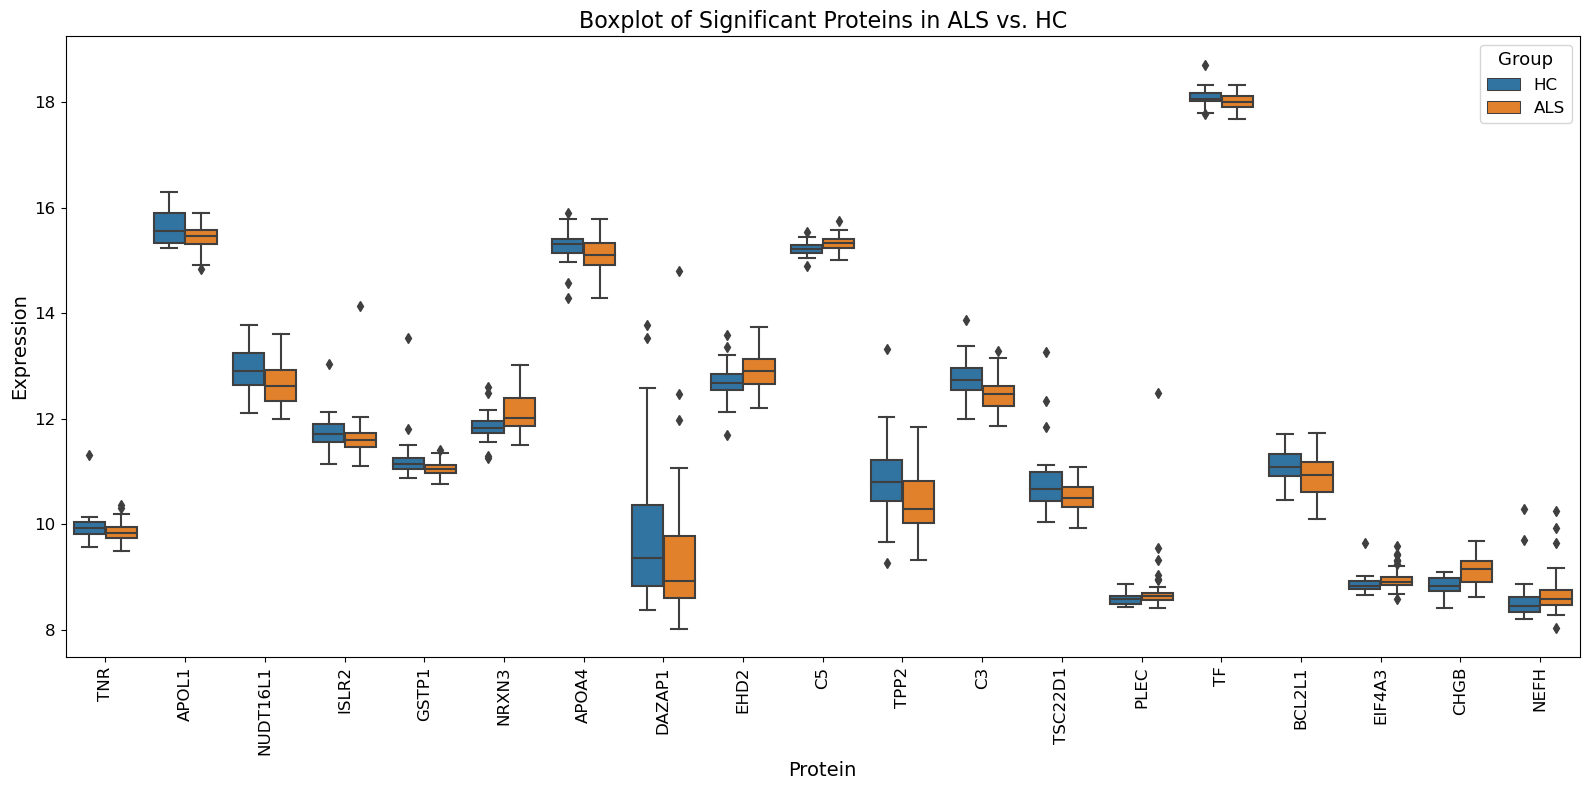

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))

sns.boxplot(data=melted, x='Protein', y='Expression', hue='Group')

# Increase font sizes
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Protein', fontsize=14)
plt.ylabel('Expression', fontsize=14)
plt.title('Boxplot of Significant Proteins in ALS vs. HC', fontsize=16)

# Increase legend font size
plt.legend(title='Group', title_fontsize=13, fontsize=12)

plt.tight_layout()
plt.show()


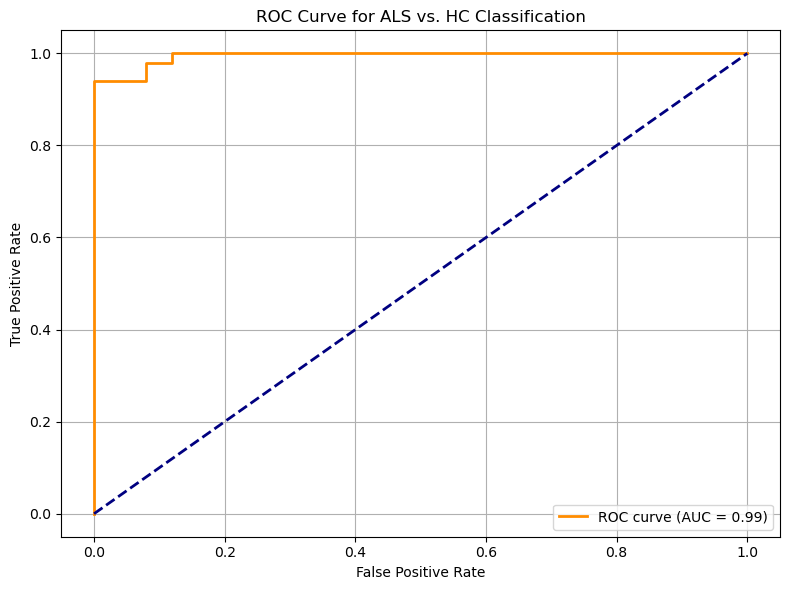

In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Filter significant proteins
significant_proteins = soma[soma['p_value'] < 0.05].index.tolist()
expression_sig = soma.loc[significant_proteins, soma.columns.str.startswith(('HC ', 'ALS '))]

# Step 2: Prepare data
X = expression_sig.T  # Samples as rows, proteins as columns
y = np.array([0 if name.startswith('HC ') else 1 for name in X.index])  # 0 = HC, 1 = ALS

# Step 3: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train classifier
clf = LogisticRegression()
clf.fit(X_scaled, y)
y_prob = clf.predict_proba(X_scaled)[:, 1]

# Step 5: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Step 6: Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ALS vs. HC Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [73]:
# Compute Pearson correlation between proteins
correlation_matrix = expression_sig.corr(method='pearson')
correlation_matrix = expression_sig.T.corr()



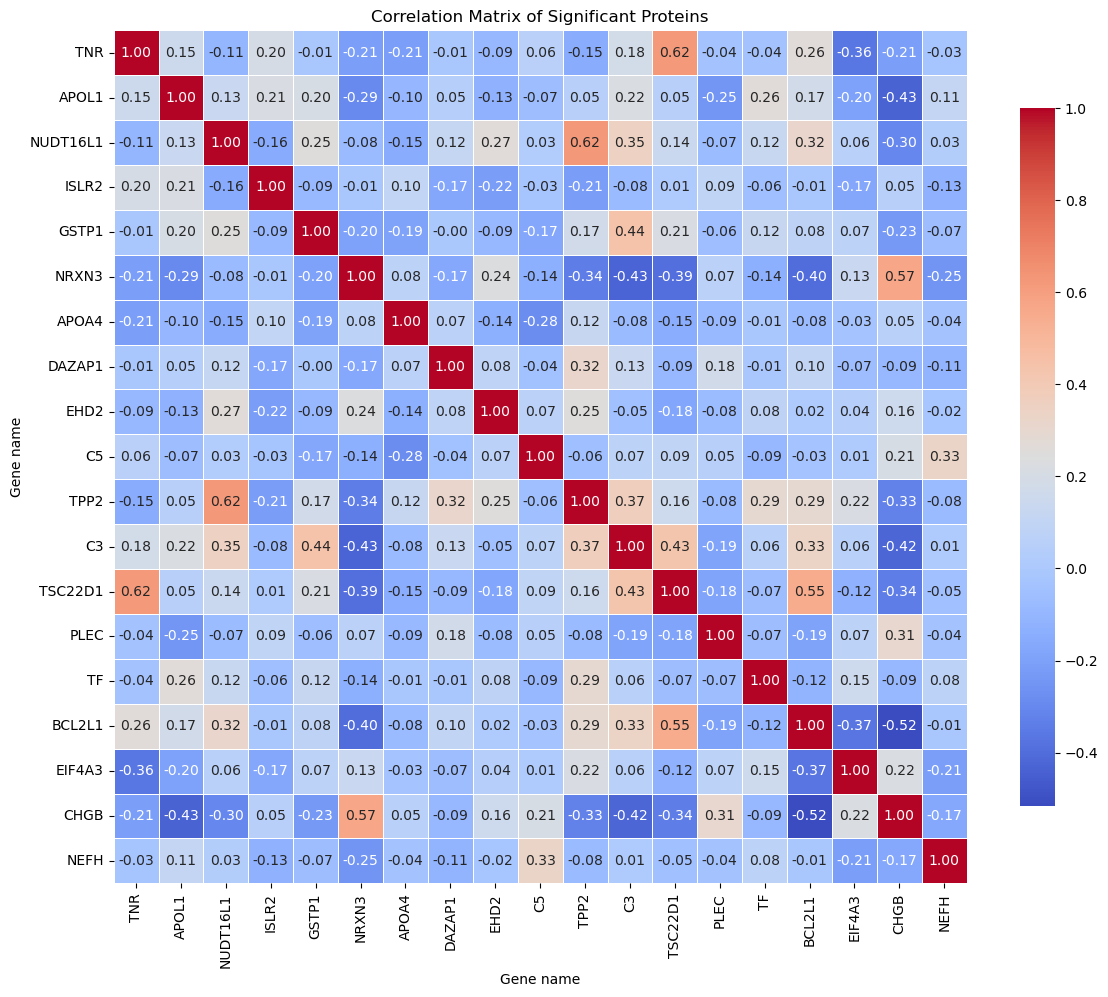

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            cbar_kws={"shrink": 0.8}, linewidths=0.5)
plt.title('Correlation Matrix of Significant Proteins')
plt.tight_layout()
plt.show()


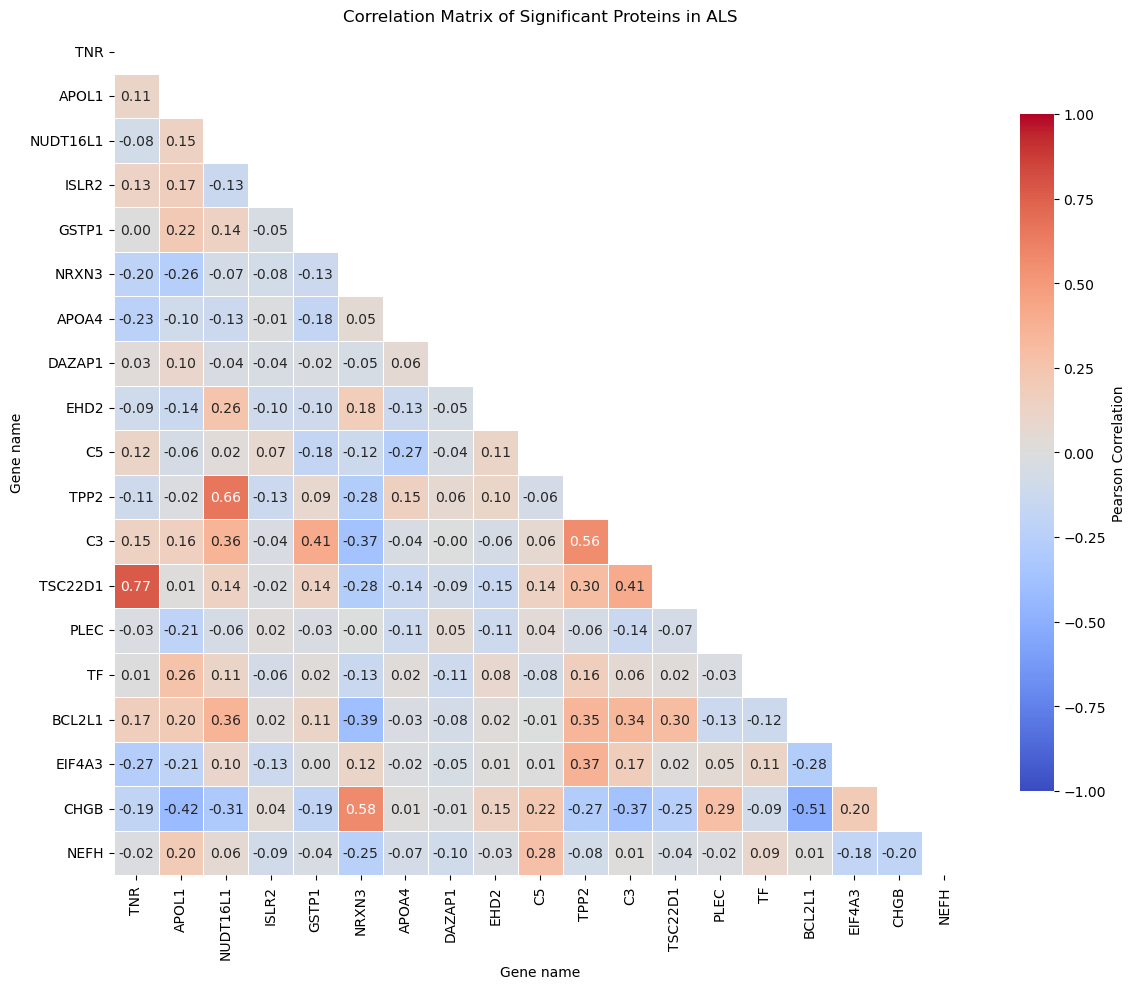

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your SomaScan protein expression data
# Replace 'your_dataframe.csv' with your actual file or DataFrame
df = pd.read_excel(r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Soma results.xlsx", header=0, index_col=0)

# Subset to the 19 significant proteins 
df = df.loc[significant_proteins]  # Optional if already filtered

# Compute correlation matrix
corr_matrix = df.T.corr()

# Mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Pearson Correlation"}
)

plt.title('Correlation Matrix of Significant Proteins in ALS')
plt.tight_layout()
plt.show()

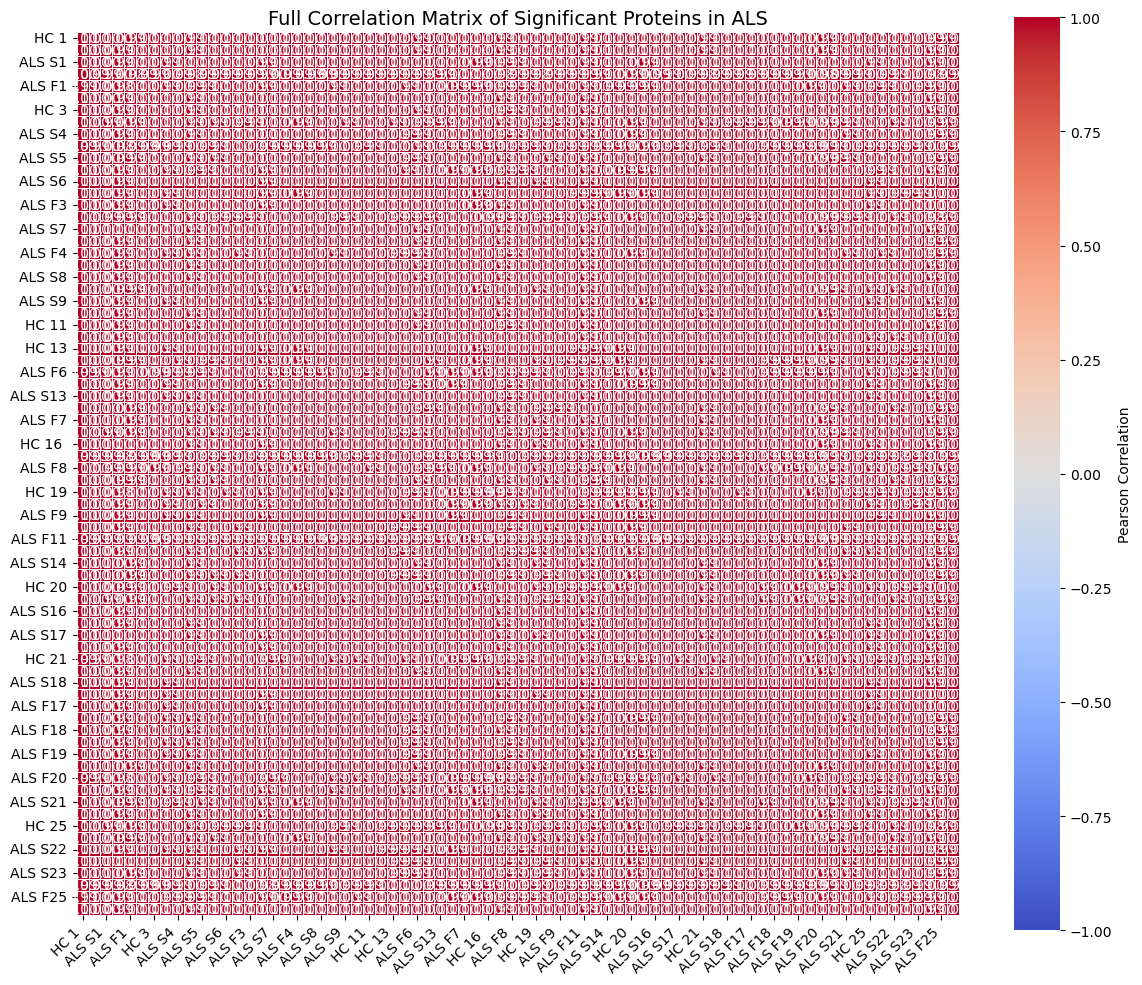

In [91]:
# Compute correlation matrix
corr_matrix = df.corr(method='pearson')

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create full heatmap (no masking)
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"label": "Pearson Correlation"}
)

plt.title('Full Correlation Matrix of Significant Proteins in ALS', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

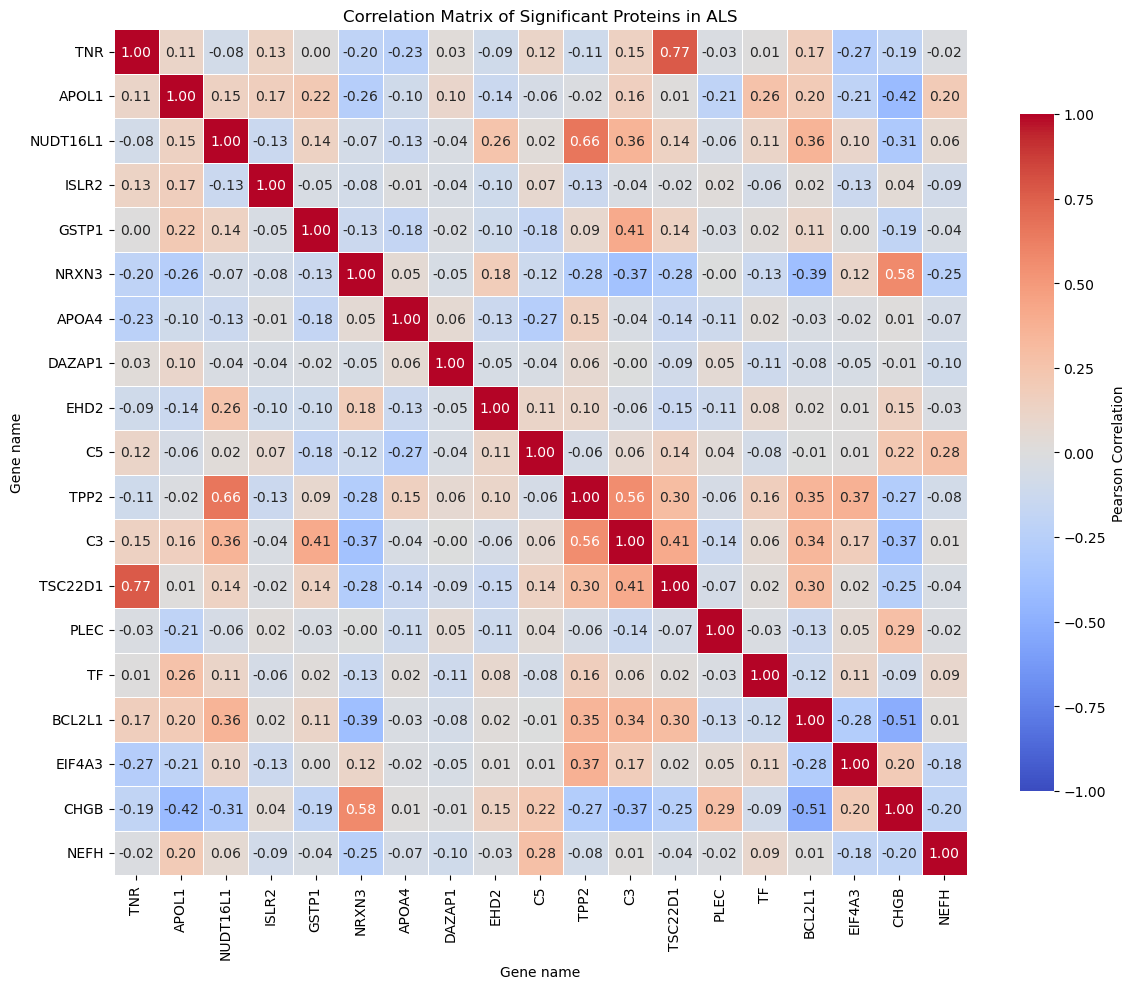

In [92]:
# Subset to the 19 significant proteins 
df = df.loc[significant_proteins]  # Optional if already filtered

# Compute correlation matrix
corr_matrix = df.T.corr()



# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Pearson Correlation"}
)

plt.title('Correlation Matrix of Significant Proteins in ALS')
plt.tight_layout()
plt.show()